 # Midterm Exam
Arash Modaresi Rad
 
 Deadline: April 3, 2020

In [1]:
import numpy as np
from numpy.random import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from time import time
from scipy import stats
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split , StratifiedKFold, KFold, cross_validate, learning_curve, GridSearchCV

 <br/>
 <br/>

 ## Principal Component Analysis

 ---
 ---

 ### Problem 1: PCA - Variance Maximization (20 points)

 Design and implement a gradient approach to determine the first dimension of
 the PCA transformation.

 > __NOTE__: Compute the derivatives, and I suggest approaching the problem as
 > a minimization of the Lagrange function.

 ---


**First PC**

Assuming that x is an n-dimensional random vector, we want to project the n-dimensional random variable onto the line defined by q. This dot product result in $q^T x$ and we want to define a direction of maximal variation:

\begin{equation*}
argmax_q Var[q^T x]
\end{equation*}

but a dot product is only a projection in a geometric sense if q is a unit vector and therfore, we impose the following constrain:

\begin{equation*}
q^T q = 1
\end{equation*}

Introducing the Lagrange multiplier λ, we rewrite our optimization as follows:

\begin{equation*}
argmax_{q,λ} Var[q^T x] + λ(1-q^Tq)
\end{equation*}

and we solve:

\begin{equation*}
\triangledown_qf = 0\\
\frac{\partial f}{\partial λ} = 0 \leftrightarrow q^Tq-1 = 0  
\end{equation*} 

with the definition of covariance matrix of X we can write

\begin{equation*}
C = \frac{X^TX}{n} \\
f = q^T Cq + λ(1-q^Tq)\\
\triangledown f = 2Cq -2λq\\
Cq = λq\\
\end{equation*} 

**Seccond PC**

\begin{equation*}
f = {q_2}^TCq_2 + λ(1-{q_2}^T{q_2}) - λ_2({q_2}^T{q})
\end{equation*}

\begin{equation*}
\triangledown f = 2(C - \lambda I) q_2 - \lambda_2 q = 0 \\
\end{equation*}

knowing that $\triangledown f = 0$ and $\lambda_2 = 0$ we have

\begin{equation*}
Cq_2 = λq_2\\
\end{equation*} 

Unfortunatly the implementation of gradeint decent was not stable and was not converging in any of my tests.

Load the iris data:

In [2]:
iris = sm.datasets.get_rdataset('iris').data
iris_data = iris.drop(labels='Species', axis=1)
iris_target = iris.drop(labels=['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'], axis=1)
#iris_target.head()

C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\statsmodels\datasets\utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


Normalize it

In [3]:
mean = np.mean(iris_data, axis = 0)
scale = np.std(iris_data, axis = 0)
iris_data_std = (iris_data - mean) / scale
iris_data_std.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


compute covariance and and eigenvales and vectos:

In [4]:
vector_mean = np.mean(iris_data_std, axis = 0)
vector_diff = iris_data_std - vector_mean
cov_data  = vector_diff.T @ vector_diff / (iris_data_std.shape[0] - 1)
print('Covariance matrix \n {}'.format(cov_data))

Covariance matrix 
               Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.006711    -0.118359      0.877604     0.823431
Sepal.Width      -0.118359     1.006711     -0.431316    -0.368583
Petal.Length      0.877604    -0.431316      1.006711     0.969328
Petal.Width       0.823431    -0.368583      0.969328     1.006711


In [5]:
eig_values, eig_vectors = np.linalg.eig(cov_data)
print('Eigenvectors \n%s' % eig_vectors)
print('\nEigenvalues \n%s' % eig_values)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


Now lets see how each PC contributes to total variance:

In [6]:
eig_values_sumed = np.sum(eig_values)
variance = eig_values / eig_values_sumed
cumulative_var = np.cumsum(variance)
print('Variance Explained: ', variance)
print('\nCumulative Variance Explained: ', cumulative_var)

Variance Explained:  [0.72962445 0.22850762 0.03668922 0.00517871]

Cumulative Variance Explained:  [0.72962445 0.95813207 0.99482129 1.        ]


so the first PC is:

In [7]:
PC_1 = iris_data_std @ eig_vectors[:,0]
print('First PC:\n%s'% PC_1.head())

First PC:
0   -2.264703
1   -2.080961
2   -2.364229
3   -2.299384
4   -2.389842
dtype: float64


 ### Problem 2: PCA - Variance Maximization (20)

 Repeat Problem 1, this time determining the second dimension of the PCA
 transformation.

 ---


Theory is written in question one.

The seccond PC is:

In [8]:
PC_2 = iris_data_std @ eig_vectors[:,1]
print('Seccond PC:\n%s'% PC_2.head())

Seccond PC:
0   -0.480027
1    0.674134
2    0.341908
3    0.597395
4   -0.646835
dtype: float64


 ### Problem 3: PCA - Comparison of gradient approach versus SVD (10)

 Describe the benefit of a gradient approach compared to using the singular
 value decomposition to perform the PCA transformation.

There are a number of different approches when it comes to PCA transformation <br /> 
<br /> 
**SVD approuch**  <br />
1- Solving a full-rank SVD for a dataset with large number of features is computationaly expensive.<br /> 
2- truncated SVD is an alternative approuch when it comes to large number of features that it only computes some of the top PCs. Therefore, it is much faster than the original full-rank SVD. <br /> 
*However, SVD is more stable than typical eigenvalue decomoposition procedures, especially, for machine learning. In machine learning it is easy to end up with highly collinear regressors. SVD works better in these cases.* <br /> 
<br /> 
**Gradient approuch**  <br />
1- Gradient approuch computes the gradient of the objective function and the initial vectors are updated to the reverse direction of the gradient, therefore all data are considered in computation.<br />
2- Stochastic gradient descent that calculates the gradient with a subset of the data and therfore, this method is faster and memory-efficient due to the calculation of the stochastic gradient is decomposable as the sum of the gradient of individual data points. <br />
<br />
**Advantages of Gradient approuch**  <br />
1- Stochastic gradient approuch does not require all data to be used at once and is faster and memory-efficientn incomparison to both full-rank SVD and truncated SVD that solve for all PCs using all date at once.  <br />
2- Gradient approuch does not require all be PCs to be calculated at once, However, SVD computes all PCs at once. <br />
3- In gradient approuch computation of covariance matrix is less demanding as it is not product of two compared two SVD approuch that has a power of two. <br />

 <br/>
 <br/>

 ## Binary Classification

 ---
 ---

 ### Problem 4: Logisitic Regression and SVM - Multiclass Classification (20)

 By using a binary classifier (logistic regression or support vector machine),
 please implement in python the two different procedures (one vs. one and one
 vs. other) to classify more than two different classes. You can use this
 [Wikipedia reference](https://en.wikipedia.org/wiki/Multiclass_classification)

 > __NOTE__: Use the Iris dataset

 ---


### one vs. one

lets label the species numerically

In [9]:
iris.loc[iris.Species == 'setosa', 'Species'] = 0
iris.loc[iris.Species == 'virginica', 'Species'] = 1
iris.loc[iris.Species == 'versicolor', 'Species'] = 2
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


An standard class

In [10]:
class standardizer():
    def __init__(self):
        self.std = 0
    #@property
    #@staticmethod
    def STD(self, data):
        mean = np.mean(data, axis = 0)
        scale = np.std(data, axis = 0)
        self.std = (data - mean) / scale
        return self.std

Create test and train samples.

In [11]:
iris_train  = iris.sample(frac = 0.8, random_state = 10)
test_mask = pd.Series(True, index = iris.index)
test_mask[iris_train.index] = False
iris_test = iris[test_mask]

iris_data_test = iris_test.drop('Species', axis = 1)
STDr = standardizer()
iris_data_test_std = STDr.STD(iris_data_test)
iris_target_test = iris_test.drop(labels = ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'], axis=1)

Use Logestic regression to make predictions

In [12]:
sc = StandardScaler()
Decision = []
for Class in range(3):
    iris_train_new = iris_train.loc[iris_train.Species != Class]
    data = iris_train_new.drop('Species', axis=1)
    target = iris_train_new.drop(labels = ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'], axis=1)
    data_std = STDr.STD(data)
    model = LogisticRegression(penalty = 'l2', C = 0.001, solver = 'liblinear').fit(data_std, target)
    Decision.append(model.predict(iris_data_test_std))

C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Find the best class

In [13]:
Decision_T = np.array(Decision).T
Predictions = stats.mode(Decision_T, axis=1)

Test accuracy is:

In [14]:
accuracy_score(iris_target_test, Predictions[0])

0.8

### one vs. other

Use Logestic regression to make predictions

In [15]:
Decision = []
iris_train_new = []
for Class in range(3):
    iris_train_new = iris_train.copy()
    iris_train_new.loc[iris_train_new.Species != Class,'Species'] = 5 
    data = iris_train_new.drop('Species', axis = 1)
    target = iris_train_new.drop(labels = ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'], axis=1)
    data_std = STDr.STD(data)
    model = LogisticRegression(penalty = 'l2', C = 0.001, solver = 'liblinear').fit(data_std, target)
    model_probability = model.predict_proba(iris_data_test_std)[:,0]
    Decision.append(model_probability)

C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Find the best class

In [16]:
Decision_T = np.array(Decision).T
Predictions = np.argmax(Decision_T, axis = 1)

Test accuracy is:

In [17]:
accuracy_score(iris_target_test, Predictions)

0.8333333333333334

 <br/>
 <br/>

 ## Underfitting and Overfitting

 ---
 ---

 ### Problem 5: Decision tree and SVM - Extensively describe over/under -fitting (20)

 Extensively describe overfitting and underfitting. Implement examples of each
 using decision trees and support vector machines.

 > __NOTE__:
 > * Use the scikit-learn implementations of decision trees and SVMs
 > * Use of a kernel with the SVM algorithm is optional

 ---


### decision trees

For this problem we use a two-dimensional dataset containing 1500 labeled instances, each of which is assigned to one of two classes, 0 or 1. <br /> 
1- Instances from class 1 are generated from a mixture of 3 Gaussian distributions, centered at [6,14], [10,6], and [14 14], 2- Instances from class 0 are generated from a uniform distribution in a square region, whose sides have a length equals to 20. respectively. <br /> 
<br /> 

import data:

In [18]:
def Data_generate(size):
    N = size #6000

    mean1 = [6, 14]
    mean2 = [10, 6]
    mean3 = [14, 14]
    cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

    np.random.seed(50)
    data = np.random.multivariate_normal(mean1, cov, int(N/6))
    data = np.concatenate((data, np.random.multivariate_normal(mean2, cov, int(N/6))))
    data = np.concatenate((data, np.random.multivariate_normal(mean3, cov, int(N/6))))
    data = np.concatenate((data, 20*np.random.rand(int(N/2),2)))
    target = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))
    
    return data, target

Build a model and try with different tree depths:

In [19]:
data, target = Data_generate(6000)
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=10)
                                                                    
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    model = tree.DecisionTreeClassifier(max_depth=depth)
    model_fit = model.fit(data_train, target_train)
    target_predTrain = model_fit.predict(data_train)
    target_predTest = model_fit.predict(data_test)
    trainAcc[index] = accuracy_score(target_train, target_predTrain)
    testAcc[index] = accuracy_score(target_test, target_predTest)
    index += 1

Now lets plot the results:

Text(0, 0.5, 'Accuracy')

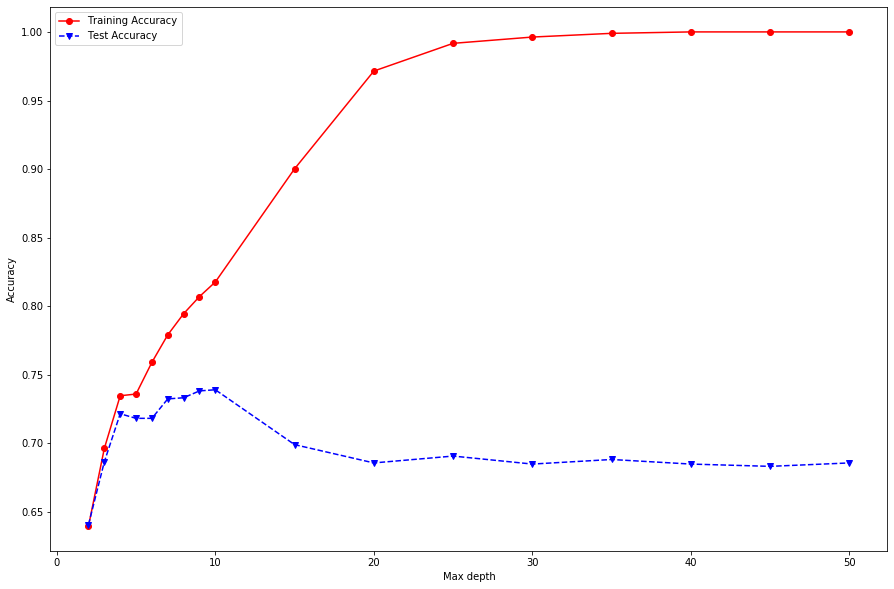

In [20]:
fig = plt.figure(figsize=(15, 10))
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

**Overfitting:**  Definition: Overfitting is the case where the overall cost is really small, but the generalization of the model is unreliable. This is due to the model learning “too much” from the training data set. <br />
The plot shows that although training accurecy continously increases, the test accuracy decreases after tree depth of **4**. This shows that using a depth of 4 and more results in overfitting of the model in training. <br /> 
<br /> 
**Underfitting:** Definition: Underfitting is the case where the model has “ not learned enough” from the training data, resulting in low generalization and unreliable predictions.<br />
If we use tree depth less than 4, testing accurecy is below its peak and therefore we are underfitting and not learing enough. <br /> 

### SVM

Lets use RBF kernal with fixed gamma parameter and changing C

Text(0, 0.5, 'Accuracy')

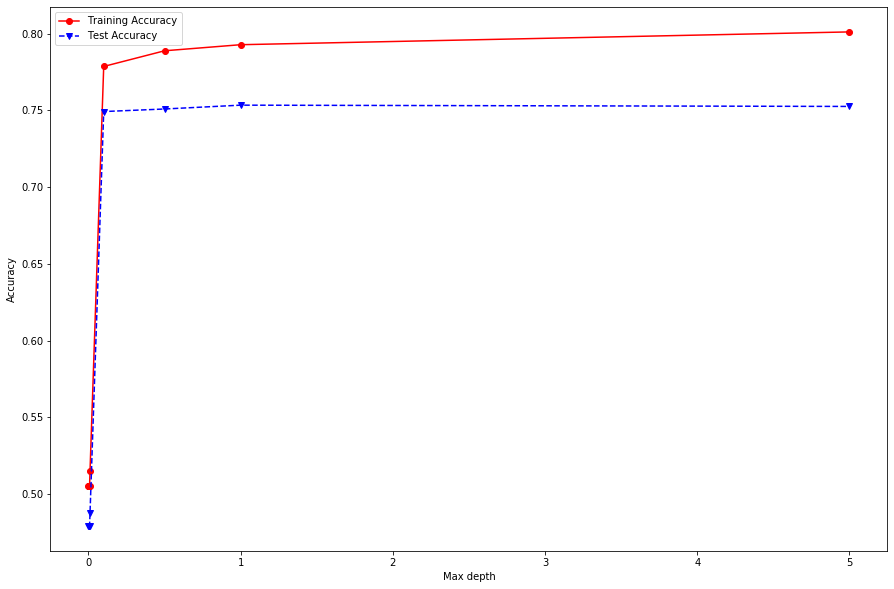

In [21]:
C = [0.000001,0.0001,0.0005,0.0008,0.001,0.003,0.005,0.007,0.01,0.1,0.5,1,5]
trainAcc = np.zeros(len(C))
testAcc = np.zeros(len(C))

index = 0
for depth in C:
    model = svm.SVC(kernel='rbf', C=depth, gamma=1)
    model_fit = model.fit(data_train, target_train)
    target_predTrain = model_fit.predict(data_train)
    target_predTest = model_fit.predict(data_test)
    trainAcc[index] = accuracy_score(target_train, target_predTrain)
    testAcc[index] = accuracy_score(target_test, target_predTest)
    index += 1

fig = plt.figure(figsize=(15, 10))
plt.plot(C,trainAcc,'ro-',C,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

Lets use RBF kernal with fixed C parameter and changing gamma

Text(0, 0.5, 'Accuracy')

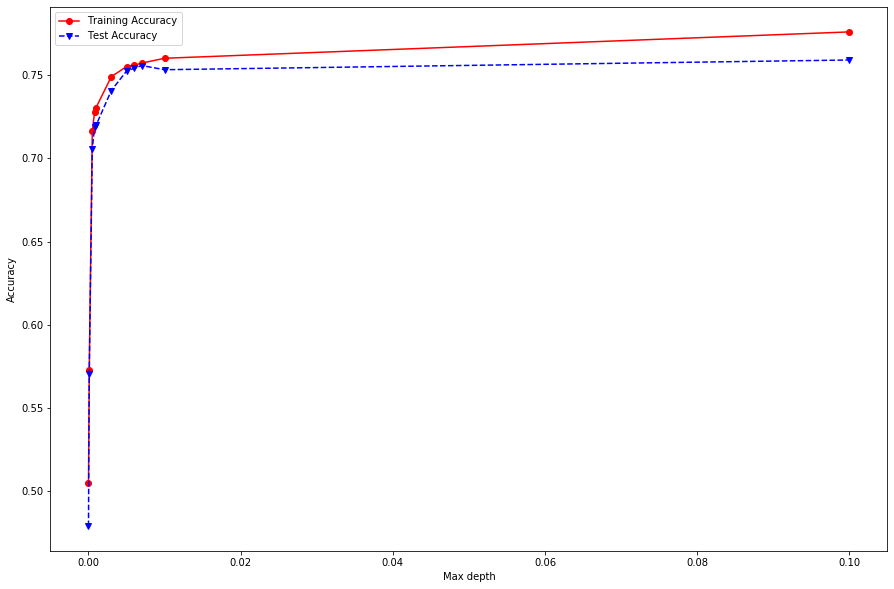

In [22]:
gamma = [0.000001,0.0001,0.0005,0.0008,0.001,0.003,0.005,0.006,0.007,0.01,0.1]
trainAcc = np.zeros(len(gamma))
testAcc = np.zeros(len(gamma))

index = 0
for depth in gamma:
    model = svm.SVC(kernel='rbf', C=1, gamma=depth)
    model_fit = model.fit(data_train, target_train)
    target_predTrain = model_fit.predict(data_train)
    target_predTest = model_fit.predict(data_test)
    trainAcc[index] = accuracy_score(target_train, target_predTrain)
    testAcc[index] = accuracy_score(target_test, target_predTest)
    index += 1
    
fig = plt.figure(figsize=(15, 10))
plt.plot(gamma,trainAcc,'ro-',gamma,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

As shown in both figure above, both training accurecy increases constantly but testing accuracy decresses after C=1 and gamma=0.007. Here we used a non-linear RBF kernel function, then the smoothness of the kernel function also has an effect on the complexity of the classifier and hence on the risk of over-fitting. If a Radial Basis Function (RBF) kernel is used and if you use a high value of the scale factor (kernel parameter), the output of the classifier will be very sensitive to small changes in the input, which means that even with margin maximisation, you are likely to get over-fitting.
Unfortunately, the performance of the SVM can be quite sensitive to the selection of the regularisation and kernel parameters, and it is possible to get over-fitting in tuning these hyper-parameters via e.g. cross-validation. The theory underpinning SVMs does nothing to prevent this form of over-fitting in model selection

 <br/>
 <br/>

 ## Polynomial Interpolation

 ---
 ---

 ### Problem 6: Efficiency of Kernels (10)

 Show examples or situations when the usage of a kernel is more
 computationally efficient w.r.t. training and prediction using polynomial
 features transformation.

 > __NOTE__: Use computation time as your efficiency measure.

 ---


Using the previous dataset we can test the training time required for diffrent kernels of **linear**, **RBF**, and **polynomial** as follows:

In [23]:
data, target = Data_generate(120000)
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=10)
data_train = STDr.STD(data_train)
data_test = STDr.STD(data_test)

clf_lin = svm.SVC(kernel = 'linear', C = 0.003, gamma = 'auto')
clf_rbf = svm.SVC(kernel = 'rbf', C = 0.003, gamma = 'auto')
clf_poly = svm.SVC(kernel = 'poly', C = 0.003, gamma = 'auto', degree = 2)

start = time()
clf_lin.fit(data_train, target_train)
print("Linear Kernel Standardized Fit Time: {} s".format(time() - start))

start = time()
clf_rbf.fit(data_train, target_train)
print("RBF Kernel Standardized Fit Time: {} s".format(time() - start))

start = time()
clf_poly.fit(data_train, target_train)
print("Polynomial Kernel Standardized Fit Time: {} s".format(time() - start))

Linear Kernel Standardized Fit Time: 291.046683549881 s
RBF Kernel Standardized Fit Time: 485.9539315700531 s
Polynomial Kernel Standardized Fit Time: 272.03846645355225 s


As evidant different the results of runtime is consistant with the math as linearkernel function is the simplest form of kernal and therefore it has the lowest fit time between all three. the other two cases, are nolonger linear and therefore require more computation. As we increase the order of the polynomial kernel, the size of the function class increases. An n-th order polynomial kernel gives us all analytic functions whose derivatives of order (n+1) are constant, and hence all derivatives of and above order (n+2) are zero. 

Now lets do some transformation on data

In [24]:
def Transform(data):
    T1 = data[:,0] ** 2
    T2 = np.sqrt(2) * data[:,1] * data[:,0] 
    T3 = data[:,1] ** 2
    return np.array([T1, T2, T3]).T
data_train_transformed = Transform(data_train)

In [25]:
start = time()
clf_lin.fit(data_train_transformed, target_train)
print("Linear Kernel Standardized and transformed Fit Time: {} s".format(time() - start))

start = time()
clf_rbf.fit(data_train_transformed, target_train)
print("RBF Kernel Standardized and transformed Fit Time: {} s".format(time() - start))

start = time()
clf_poly.fit(data_train_transformed, target_train)
print("Polynomial Kernel Standardized and transformed Fit Time: {} s".format(time() - start))

Linear Kernel Standardized and transformed Fit Time: 260.6934902667999 s
RBF Kernel Standardized and transformed Fit Time: 363.03808307647705 s
Polynomial Kernel Standardized and transformed Fit Time: 298.2632131576538 s


Once dataset is alrge enough (in my case 120000) then the kernal is computationally more effecient. After transformation, the computation time of all three has increased for larg number of inputs (more than 300,000), however, if the amount of data is deressed we see that data transformation resluts in higher speed of computation. `In this case we just demonstrated that with a smaller sample size 120000 the Polynomial Kernel was faster than the transformed data. we demonstrated that using a linear kernel with transformed data is computationally more demanding that polynomial kernel it self.`

Now lets look at the results:

In [26]:
data, target = Data_generate(4500)
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=10)

clf_lin = svm.SVC(kernel = 'linear')
clf_lin.fit(data_train, target_train)
clf_rbf = svm.SVC(kernel = 'rbf')
clf_rbf.fit(data_train, target_train)
clf_poly = svm.SVC(kernel = 'poly')
clf_poly.fit(data_train, target_train)

def plot_svm(clf, name):
    plt.figure(1, figsize=(15, 10))
    plt.clf()
    plt.scatter(data[:, 0], data[:, 1], c=target, zorder=10, cmap=plt.cm.Paired,
                   edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='m',
                levels=[-1, 0, 1], alpha=1,
                linestyles=['--', '-', '--'],
                linewidth=4)

    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0],
                clf.support_vectors_[:, 1],
                s=100, linewidth=1, facecolors='b');
    plt.title('Model: {}'.format(name))
    plt.show()

C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'linewidth'


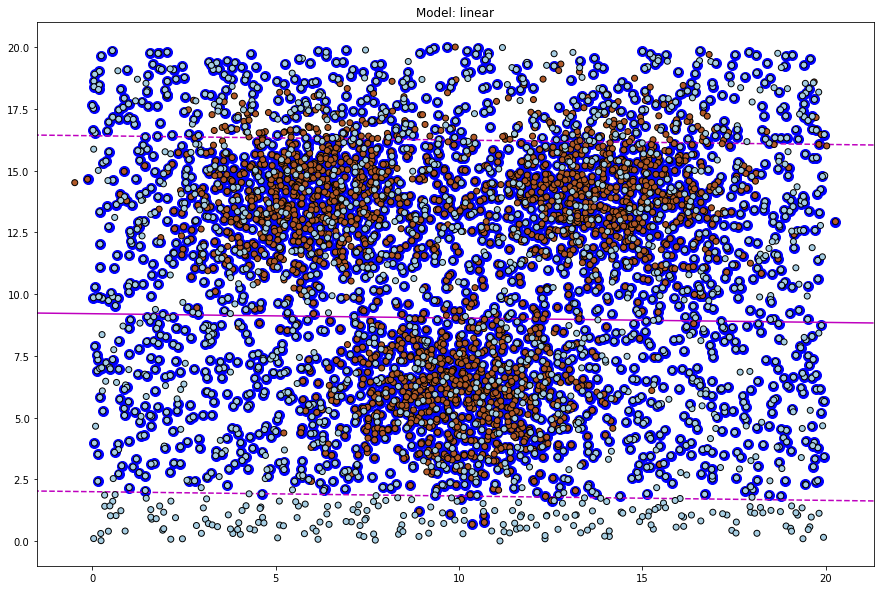

In [27]:
cld_list=[clf_lin,clf_rbf,clf_poly]
names= ['linear', 'rbf', 'poly']
plot_svm(cld_list[0], names[0])

C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'linewidth'


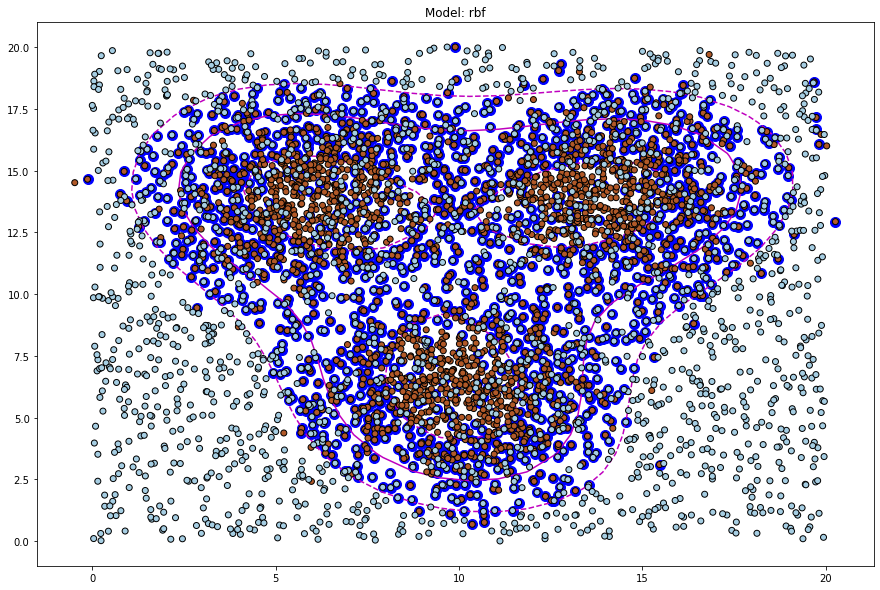

In [28]:
plot_svm(cld_list[1], names[1])

C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'linewidth'


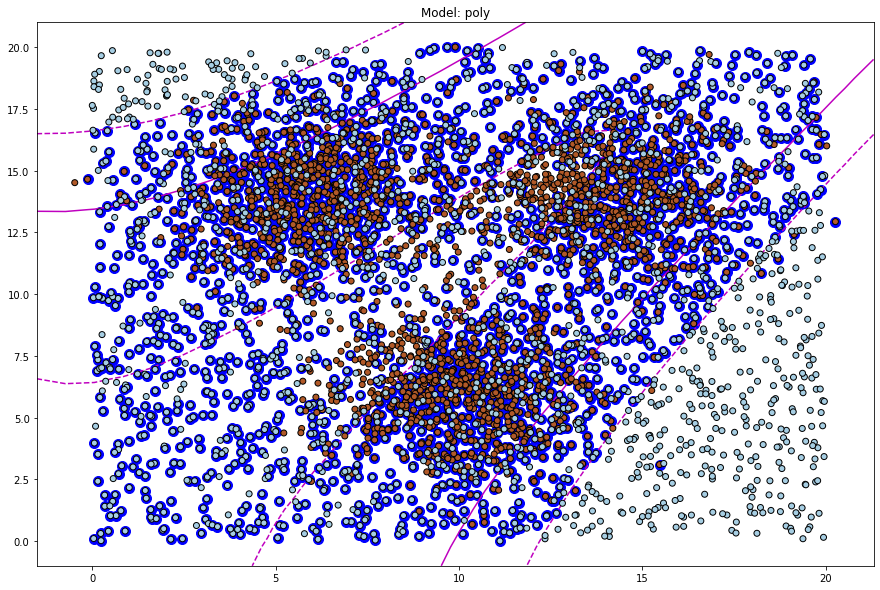

In [29]:
plot_svm(cld_list[2], names[2])

But in this case a linear kernel is not agood classifier and RBF and Polynomial are better choices and between those the RBF is computaionally more efficient and better classifies in this case.

 <br/>
 <br/>

 ## C-Support Vector Classification

 ---
 ---

 ### Problem 7: Optimization of a C-Support Vector Classifier (SVC) (10)

 Write a procedure to estimate the parameters of an
 [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
 classifier:

 1. kernel (radial basis function, polynomial, sigmoid)
 2. gamma (kernel coefficient for the above)
 3. degree (degree of the _polynomial_ kernel function)
 4. C (Regularization parameter - inverse of $\lambda$ in L2-regularization)


 Use [Exhaustive Grid
 Search](https://scikit-learn.org/stable/modules/grid_search.html),
 implemented using this
 [function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV).

 > __NOTE__: You do not need to create a novel implementation. Use
 > scikit-learn.


 Insert explananations and LaTeX here.

In [30]:
data, target = Data_generate(60)
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=10)
param_grid = [{'kernel': ['rbf'], 'C': [0.000001,0.0001,0.001,0.01,0.1,1,10,100], 'gamma': [0.1, 0.01, 0.001, 0.0001]},
              {'kernel': ['poly'], 'C':[0.000001,0.0001,0.001,0.01,0.1,1,10,100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'degree':[1,2,3,4]},
              {'kernel':['sigmoid'], 'C': [0.000001,0.0001,0.001,0.01,0.1,1,10,100], 'gamma': [0.1, 0.01, 0.001, 0.0001]}]

model = svm.SVC()
model_fit = GridSearchCV(model, param_grid)
model_fit.fit(data_train, target_train)
print('Grid search optimum parameters for SVM:', model_fit.best_params_)
print('\nNow lets look at some classification stats:')
print(classification_report(target_test, model_fit.predict(data_test)))

Grid search optimum parameters for SVM: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

Now lets look at some classification stats:
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67         5
         1.0       0.75      0.86      0.80         7

    accuracy                           0.75        12
   macro avg       0.75      0.73      0.73        12
weighted avg       0.75      0.75      0.74        12



 <br/>
 <br/>

 ## Additional Kernels

 ---
 ---

 ### Problem 8: Demonstration os Graph- String- and Sigmoid- Kernels (20)

 Create examples to explain the properties and usefulness of the following:

 1. [graph kernel](https://en.wikipedia.org/wiki/Graph_kernel)
 2. [string kernel](https://en.wikipedia.org/wiki/String_kernel)
 3. [pairwise sigmoid
    kernel](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.sigmoid_kernel.html)


#### Graph kernels

I will explore how to utilize graph kernels and graph classification techniques in order to enhance natural language processing tasks such as the task of text categorization. Text categorization is the problem of automatically assigning category labels to textual documents. This problem is prevalent in many applications, including automatic news classification and opinion mining in product reviews. We will formulate the problem of text categorization as a graph classification problem, and then use graph kernels and the SVM classifier to solve it.

The following code reads the data from the disk, applies some pre-processing steps (e.g., stemming), and extracts the vocabulary.

In [31]:
import re
from nltk.stem.porter import PorterStemmer
import warnings
warnings.filterwarnings('ignore')

def load_file(filename):
    labels = []
    docs =[]

    with open(filename, encoding='utf8', errors='ignore') as f:
        for line in f:
            content = line.split('\t')
            labels.append(content[0])
            docs.append(content[1][:-1])
    
    return docs,labels  


def clean_str(string):
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)     
    string = re.sub(r"\'s", " \'s", string) 
    string = re.sub(r"\'ve", " \'ve", string) 
    string = re.sub(r"n\'t", " n\'t", string) 
    string = re.sub(r"\'re", " \'re", string) 
    string = re.sub(r"\'d", " \'d", string) 
    string = re.sub(r"\'ll", " \'ll", string) 
    string = re.sub(r",", " , ", string) 
    string = re.sub(r"!", " ! ", string) 
    string = re.sub(r"\(", " \( ", string) 
    string = re.sub(r"\)", " \) ", string) 
    string = re.sub(r"\?", " \? ", string) 
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower().split()


def preprocessing(docs): 
    preprocessed_docs = []
    n_sentences = 0
    stemmer = PorterStemmer()

    for doc in docs:
        clean_doc = clean_str(doc)
        preprocessed_docs.append([stemmer.stem(w) for w in clean_doc])
    
    return preprocessed_docs
    
    
def get_vocab(train_docs, test_docs):
    vocab = dict()
    
    for doc in train_docs:
        for word in doc:
            if word not in vocab:
                vocab[word] = len(vocab)

    for doc in test_docs:
        for word in doc:
            if word not in vocab:
                vocab[word] = len(vocab)
        
    return vocab


path_to_train_set = 'train_5500_coarse.label'
path_to_test_set = 'TREC_10_coarse.label'

# Read and pre-process train data
train_data, y_train = load_file(path_to_train_set)
train_data = preprocessing(train_data)

# Read and pre-process test data
test_data, y_test = load_file(path_to_test_set)
test_data = preprocessing(test_data)

# Extract vocabulary
vocab = get_vocab(train_data, test_data)
print("Vocabulary size: ", len(vocab))

Vocabulary size:  7186


We will now transform the documents into graphs and perform graph classification. The function create_graphs_of_words() that is defined below transforms a list of documents into a list of graphs. We will use the function to generate the train and test graphs. We will set the size of the window to 3.

Example of graph-of-words representation of document


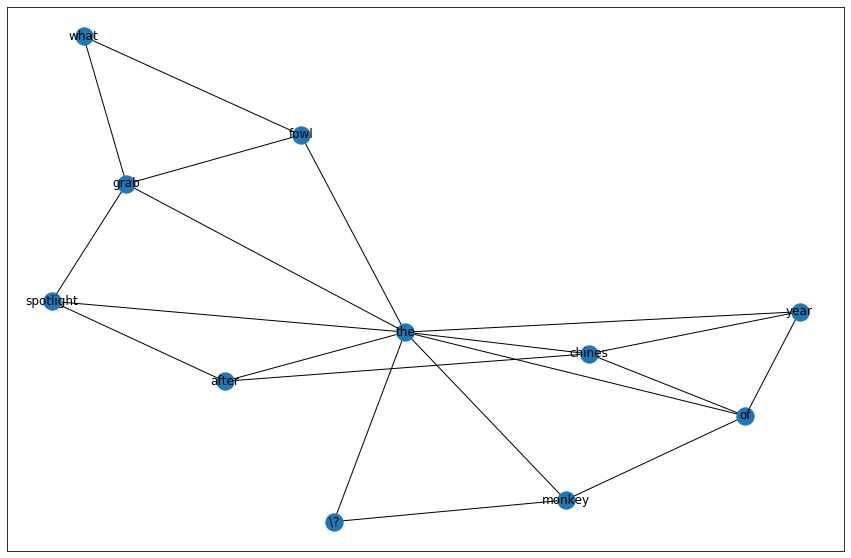

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

def create_graphs_of_words(docs, vocab, window_size):
    graphs = list()
    sizes = list()
    degs = list()

    for idx,doc in enumerate(docs):
        G = nx.Graph()
        for i in range(len(doc)):
            if doc[i] not in G.nodes():
                G.add_node(doc[i])
                G.nodes[doc[i]]['label'] = vocab[doc[i]]
        for i in range(len(doc)):
            for j in range(i+1, i+window_size):
                if j < len(doc):
                    G.add_edge(doc[i], doc[j])
        
        graphs.append(G)
    
    return graphs


# Create graph-of-words representations
G_train_nx = create_graphs_of_words(train_data, vocab, 3) 
G_test_nx = create_graphs_of_words(test_data, vocab, 3)

print("Example of graph-of-words representation of document")
plt.figure(1, figsize=(15, 10))
nx.draw_networkx(G_train_nx[3], with_labels=True)


We will next utilize the graph_from_networkx() function of GraKeL to convert the NetworkX graphs to objects that can be handled by GraKeL. Then, we will initialize a Weisfeiler Lehman subtree kernel and use it to construct the two kernel matrices (i.e., train and test). Next, we will train an SVM classifier and use it to make predictions.

In [33]:
from grakel.utils import graph_from_networkx
from grakel.kernels import WeisfeilerLehman, VertexHistogram
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Transform networkx graphs to grakel representations
G_train = list(graph_from_networkx(G_train_nx, node_labels_tag='label'))
G_test = list(graph_from_networkx(G_test_nx, node_labels_tag='label'))

# Initialize a Weisfeiler-Lehman subtree kernel
gk = WeisfeilerLehman(n_iter=1, normalize=False)

# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

# Train an SVM classifier and make predictions
clf = SVC(kernel='precomputed')
clf.fit(K_train, y_train) 
y_pred = clf.predict(K_test)

# Evaluate the predictions
print("Accuracy:", accuracy_score(y_pred, y_test))

Accuracy: 0.858


#### String kernels

To use SVMs with strings it is necessary to have a measurement of similarity for different strings. The idea of the
most basic string kernel, the spectrum kernel is to count the appearance of k-mers in the string. As a result a string can
be represented as a numerical sequence and the similarity of two strings can be calculated by using different kernels,
for instance the dot product (linear kernel) of these numerical representations can be calculated. Bio sequences such
as DNA, RNA and protein sequences are widely used in SVMs, because they have some certain differences to normal
text strings (e.g. a smaller alphabet) kernels fitted to their need were invented. Suchs as the gappy-pair, mismatch and
motif kernel. For this question I will implement the `mismatch kernel`.

 Description:
 The mismatch kernel can be used with support vector machines (SVMs) in a discriminative approach to a classification
 problem. It measures the sequence similarity based on shared occurrences of k-length subsequences, counted with up
 to m mismatches, which is what we generally state as (k, m)-mismatch. The kernels can be efficiently computed by
 using a mismatch tree data structure1
 The user input consists of the following elements:
 
 1. data: 2D matrix of shape (n_samples, n_features), sequences needed to be computed as kernel
 2. l: int, size of alphabet. Examples of values with a natural interpretation:
2: for binary data
256: for data encoded as strings of bytes
4: for DNA/RNA sequence data (bioinformatics)
20: for protein data (bioinformatics)
 3. k: int, used in k-mers to compute the kernel
 4. m: int, maximum number of mismatches for 2 k-mers to be considered ‘similar’. Normally, small values of m
should work well. The complexity of the algorithm is exponential in m
The expected output is the mismatch string kernel:
 5. kernel: 2D matrix of shape (n_samples, n_samples) suggesting the similarities between sequences"


#### Pairwise Sigmoid kernels

The function sigmoid_kernel computes the sigmoid kernel between two vectors. The sigmoid kernel is also known as hyperbolic tangent, or Multilayer Perceptron (because, in the neural network field, it is often used as neuron activation function). 